In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
communities_and_crime = fetch_ucirepo(id=183)

# data (as pandas dataframes)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets

# metadata
print(communities_and_crime.metadata)

# variable information
print(communities_and_crime.variables)

{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2002, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C53W3X', 'creators': ['Michael Redmond'], 'intro_paper': {'title': 'A data-driven software tool for enabling cooperative information sharing among police departmen

Problems in the given dataset :

1) there are too many missing values

2) outliers can also be observed

3) Data type may not be correct for the columns that have missing values

4) Categorical Feature is not converted into numerical

Anomalies include:

1) Different data types that would have been converted to int or float

2) Too many Null values can be seen

3) Outliers are too many for this dataset

In [3]:
X

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12      ?         ?    TempleTerracecity    10        0.01   
1990      6      ?         ?          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6      ?         ?          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  \
0              0.33          0.02          0.90          0.12  ...   
1              0.16          0.12          0.74          0.45  ...   
2              0.42          0.49          0.56          0.17  ...   
3              0.77          1.00          0.08          0.12  ...   
4              0.55          0.02          0.95          0.09  ...   
...             ...           ...           ...           ...  ...   
1989           0.40          0.10          0.87          0.12  ...   
1990           0.96          0.46          0.28          0.83  ...   
1991           0.37          0.25          0.69          0.04  ...   
1992           0.51          0.06          0.87          0.22  ...   
1993           0.78          0.14          0.46          0.24  ...   

      PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0                 0.29      0.12     0.26            0.20       0.06   
1                    ?      0.02     0.12            0.45          ?   
2                    ?      0.01     0.21            0.02          ?   
3                    ?      0.02     0.39            0.28          ?   
4                    ?      0.04     0.09            0.02          ?   
...                ...       ...      ...             ...        ...   
1989                 ?      0.01     0.28            0.05          ?   
1990                 ?      0.02     0.37            0.20          ?   
1991              0.25      0.08     0.32            0.18       0.08   
1992              0.19      0.03     0.38            0.33       0.02   
1993              0.11      0.11     0.30            0.05       0.08   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0              0.04                  0.9                  0.5   
1                 ?                    ?                    ?   
2                 ?                    ?                    ?   
3                 ?                    ?                    ?   
4                 ?                    ?                    ?   
...             ...                  ...                  ...   
1989              ?                    ?                    ?   
1990              ?                    ?                    ?   
1991           0.06                 0.78                    0   
1992           0.02                 0.79                    0   
1993           0.04                 0.73                  0.5   

      LemasPctOfficDrugUn  PolicBudgPerPop  
0                    0.32             0.14  
1                    0.00                ?  
2                    0.00                ?  
3                    0.00                ?  
4                    0.00                ?  
...                   ...              ...  
1989                 0.00                ?  
1990                 0.00                ?  
1991                 0.91             0.28  
1992                 0.22             0.18  
1993                 1.00             0.13  

[1994 rows x 127 columns]

In [4]:
y

ViolentCrimesPerPop
0                    0.20
1                    0.67
2                    0.43
3                    0.12
4                    0.03
...                   ...
1989                 0.09
1990                 0.45
1991                 0.23
1992                 0.19
1993                 0.48

[1994 rows x 1 columns]

In [5]:
print(X['communityname'])

0              Lakewoodcity
1               Tukwilacity
2              Aberdeentown
3       Willingborotownship
4         Bethlehemtownship
               ...         
1989      TempleTerracecity
1990            Seasidecity
1991          Waterburytown
1992            Walthamcity
1993            Ontariocity
Name: communityname, Length: 1994, dtype: object


Summary ::
Many of the columns are seen to be skewed which means that the information is not very balanced .plus missing values and outliers have heavely affected the distribution of the data columns. Different columns have different types of data which many be incompatible when applying the algorithms/classifiers

In [6]:
# Step 2: Characterization
print("Characterization:")
print(X.describe())

Characterization:
             state         fold   population  householdsize  racepctblack  \
count  1994.000000  1994.000000  1994.000000    1994.000000   1994.000000   
mean     28.683551     5.493982     0.057593       0.463395      0.179629   
std      16.397553     2.873694     0.126906       0.163717      0.253442   
min       1.000000     1.000000     0.000000       0.000000      0.000000   
25%      12.000000     3.000000     0.010000       0.350000      0.020000   
50%      34.000000     5.000000     0.020000       0.440000      0.060000   
75%      42.000000     8.000000     0.050000       0.540000      0.230000   
max      56.000000    10.000000     1.000000       1.000000      1.000000   

       racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
count   1994.000000   1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean       0.753716      0.153681     0.144022     0.424218     0.493867  ...   
std        0.244039      0.208877     0.23249

In [7]:
X_df = X

In [8]:
from sklearn import preprocessing
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
X_df['communityname'] = label_encoder.fit_transform(X_df['communityname'])
X_df['communityname']

<ipython-input-8-48fbbd0adc38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['communityname'] = label_encoder.fit_transform(X_df['communityname'])


0        804
1       1625
2          1
3       1787
4        141
        ... 
1989    1597
1990    1455
1991    1707
1992    1695
1993    1165
Name: communityname, Length: 1994, dtype: int64

In [11]:
X_df['target']=y

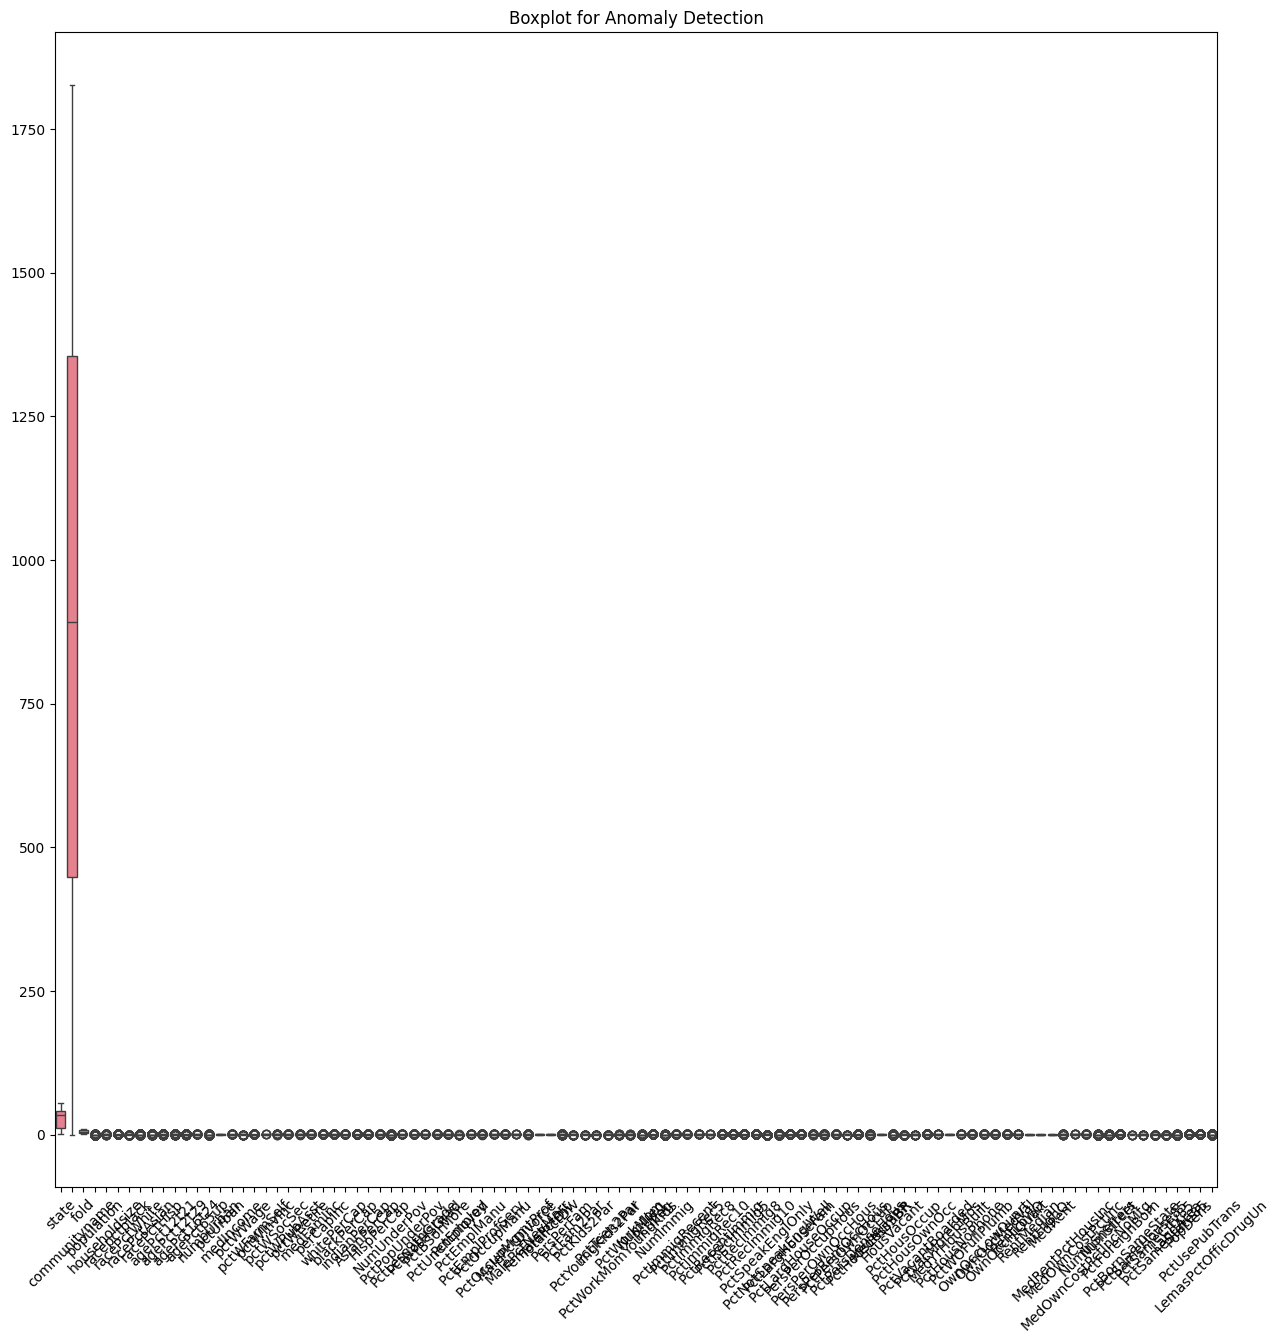

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anomaly detection
# Detecting anomalies using boxplots
plt.figure(figsize=(15, 15))
sns.boxplot(data=X_df.drop(columns='target'))
plt.title('Boxplot for Anomaly Detection')
plt.xticks(rotation=45)
plt.show()

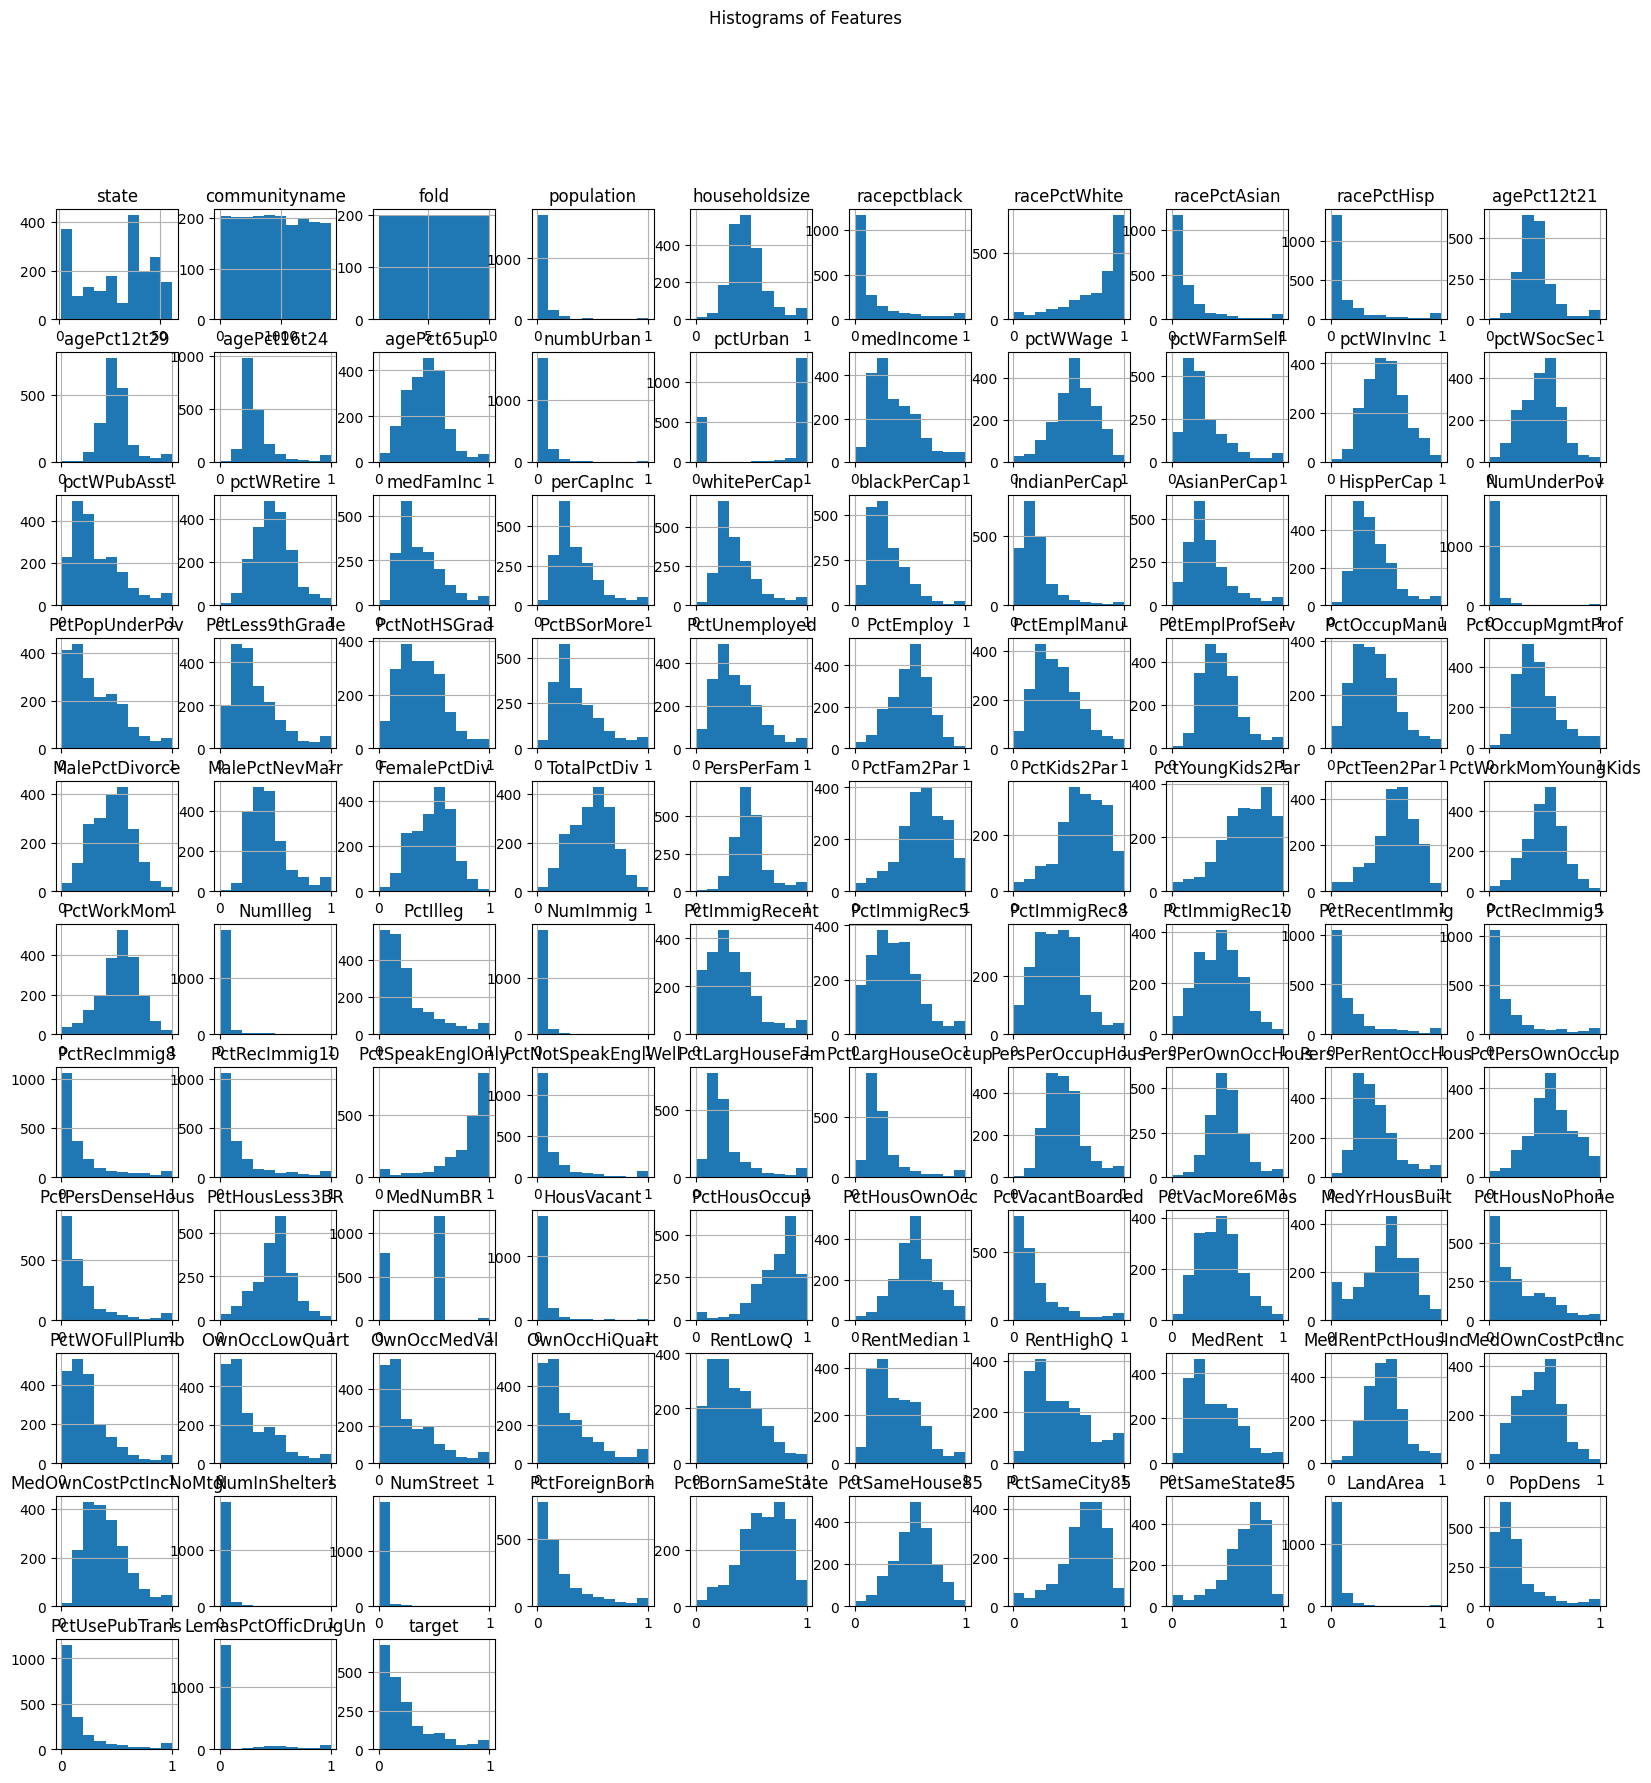

In [13]:
# 2. Data Visualization
# Histograms
X_df.hist(figsize=(20, 20))
plt.suptitle('Histograms of Features')
plt.show()

#Pros:
#Gives a brief summary of each feature's distribution
#aids in locating outliers and determining the central tendency.
#Cons:
#Representation of feature relationships is limited.

In [14]:
X_df1=X[['state','householdsize','PctSameHouse85','PctSameCity85','PctBornSameState','PctHousLess3BR','PctHousOwnOcc','PctImmigRec10','PctWorkMomYoungKids','pctWInvInc']].copy()
X_df1['target']=y
X_df1

state  householdsize  PctSameHouse85  PctSameCity85  PctBornSameState  \
0         8           0.33            0.50           0.51              0.42   
1        53           0.16            0.34           0.60              0.50   
2        24           0.42            0.54           0.67              0.49   
3        34           0.77            0.73           0.64              0.30   
4        42           0.55            0.64           0.61              0.72   
...     ...            ...             ...            ...               ...   
1989     12           0.40            0.34           0.48              0.28   
1990      6           0.96            0.17           0.10              0.25   
1991      9           0.37            0.61           0.79              0.68   
1992     25           0.51            0.54           0.59              0.64   
1993      6           0.78            0.34           0.35              0.50   

      PctHousLess3BR  PctHousOwnOcc  PctImmigRec10  PctWorkMomYoungKids  \
0               0.51           0.52           0.39                 0.74   
1               0.82           0.24           0.63                 0.46   
2               0.51           0.41           0.19                 0.71   
3               0.01           0.96           0.31                 0.85   
4               0.19           0.87           0.27                 0.40   
...              ...            ...            ...                  ...   
1989            0.49           0.55           0.47                 0.78   
1990            0.60           0.22           0.67                 0.32   
1991            0.66           0.37           0.26                 0.38   
1992            0.64           0.33           0.49                 0.57   
1993            0.55           0.49           0.65                 0.35   

      pctWInvInc  target  
0           0.60    0.20  
1           0.45    0.67  
2           0.39    0.43  
3           0.43    0.12  
4           0.68    0.03  
...          ...     ...  
1989        0.64    0.09  
1990        0.30    0.45  
1991        0.45    0.23  
1992        0.55    0.19  
1993        0.25    0.48  

[1994 rows x 11 columns]

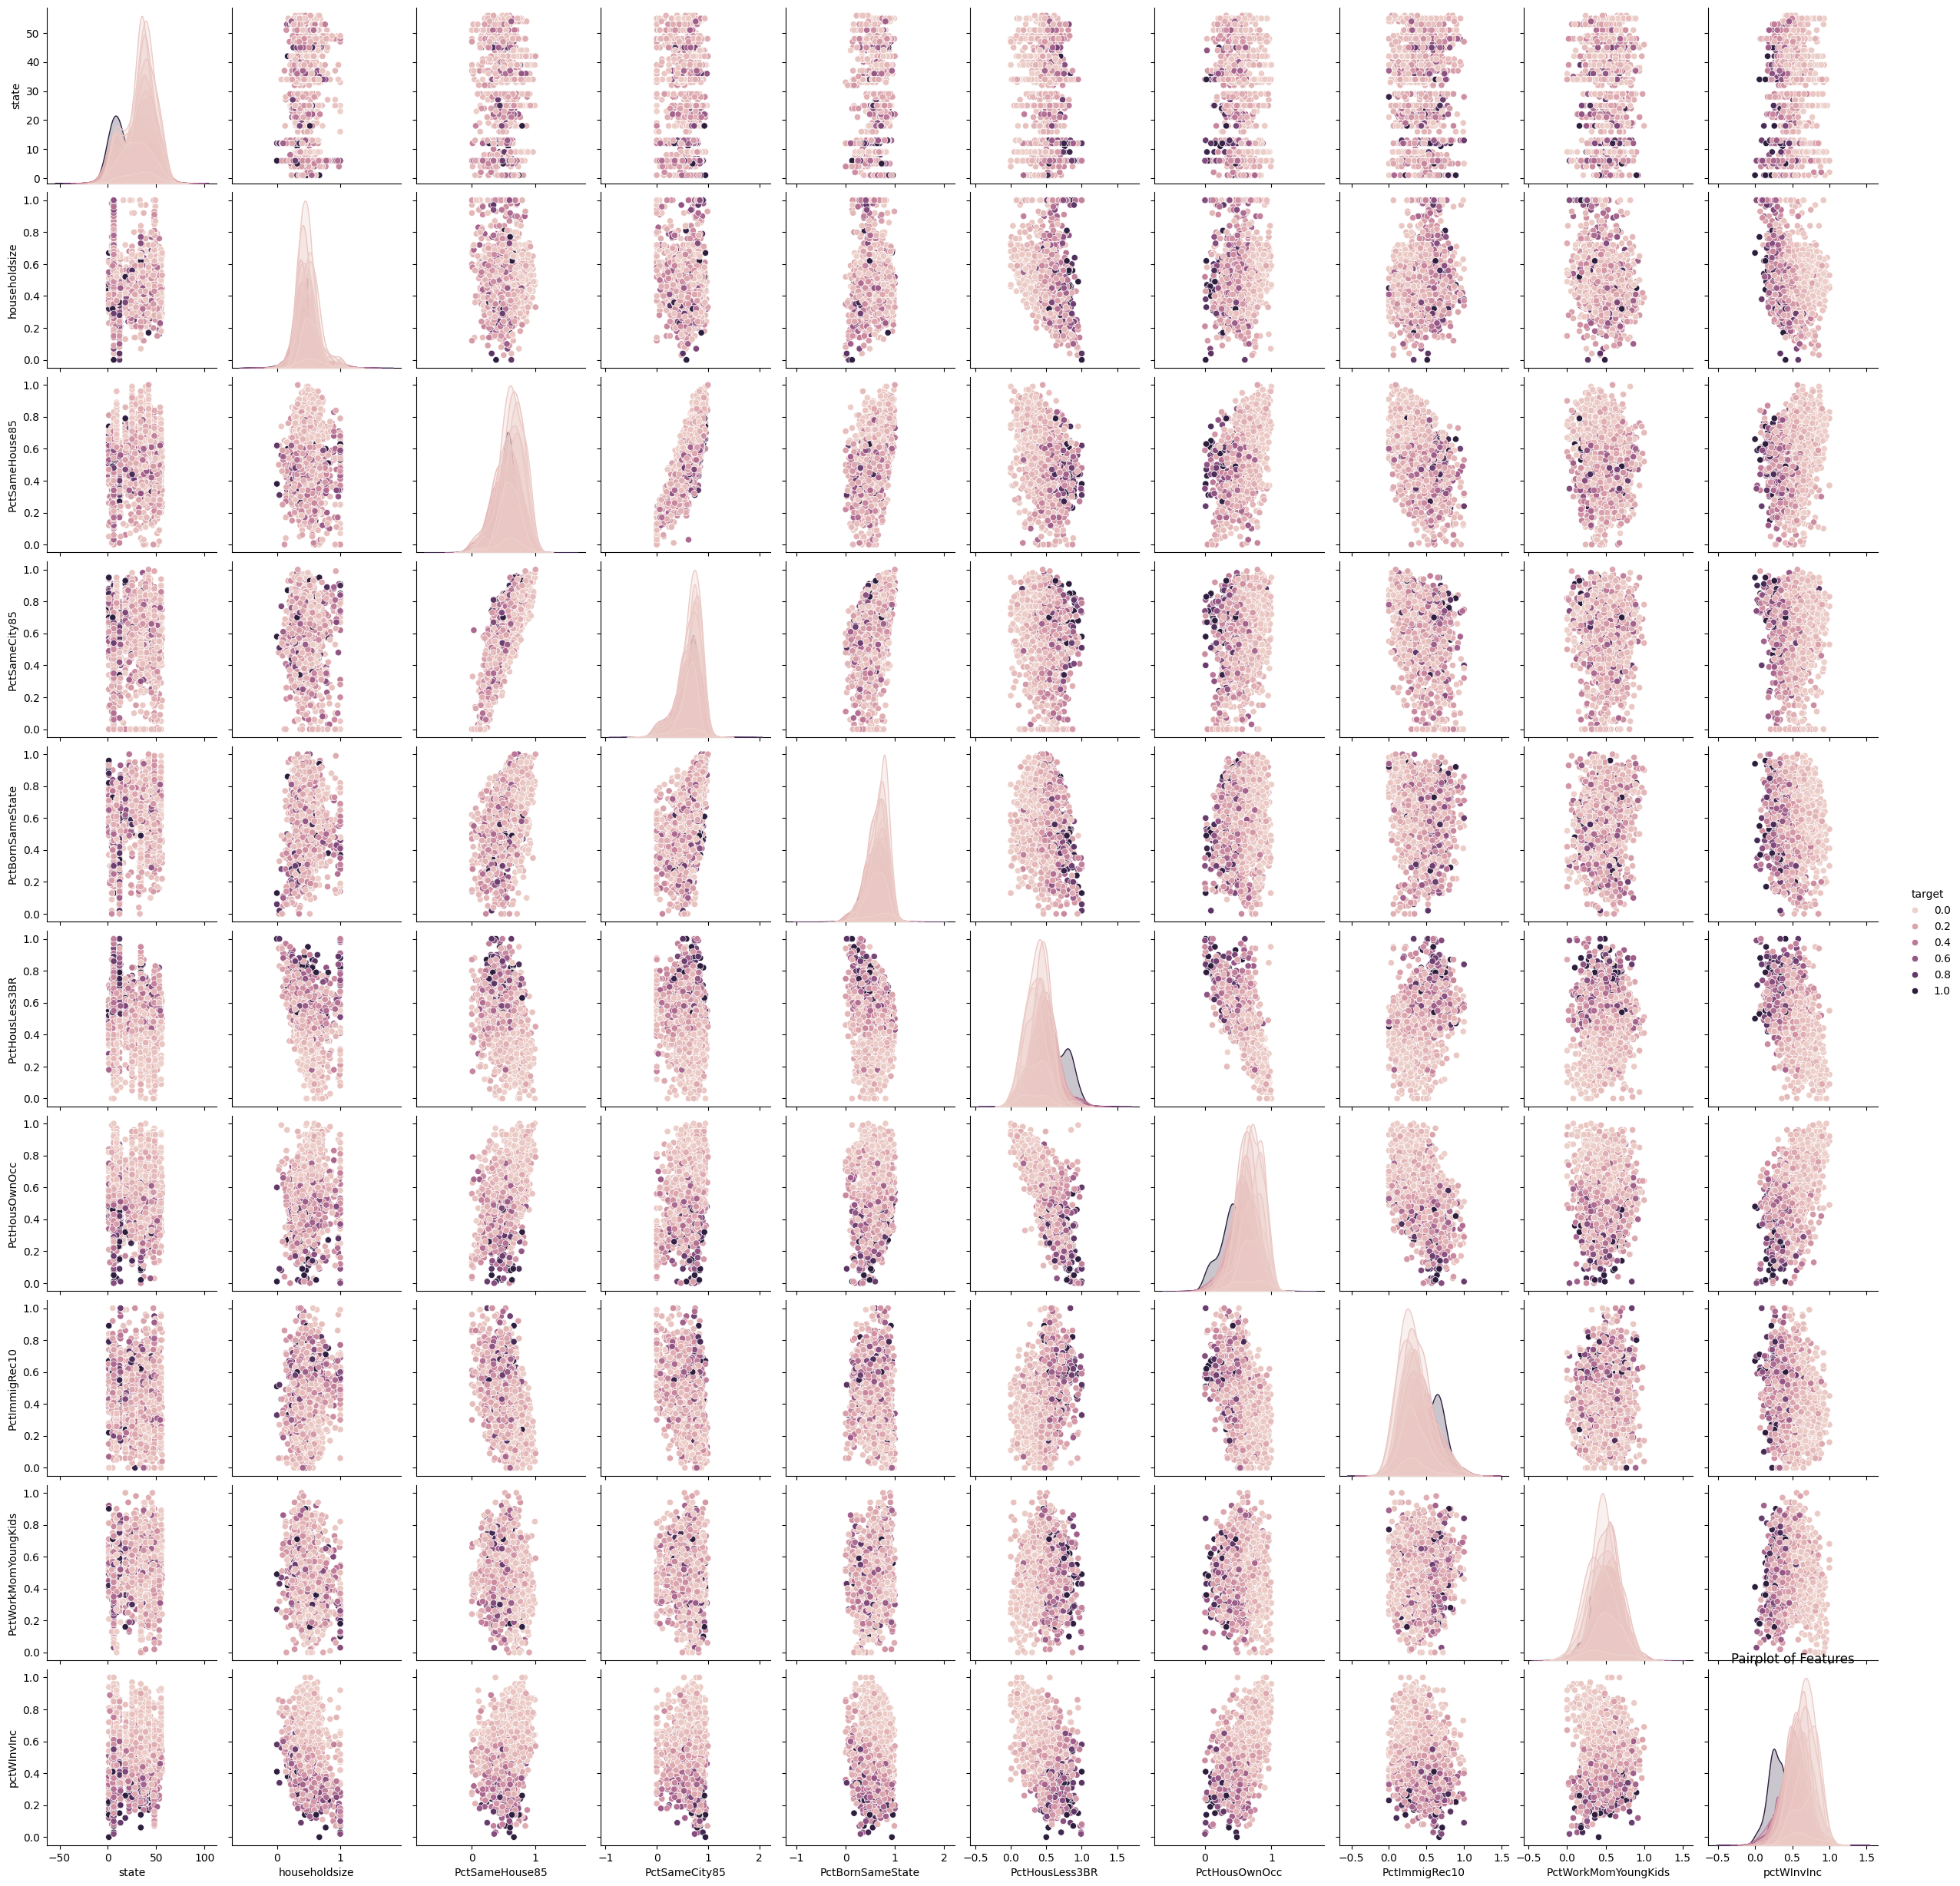

In [15]:
# Scatter plots
sns.pairplot(data=X_df1, hue='target')
plt.title('Pairplot of Features')
plt.show()

#Pros:
#Can show patterns and trends
#Visualizes relationships between pairs of features.
#Cons:
#Too many features cause it to get cluttered.
#Only able to display pairwise correlations.

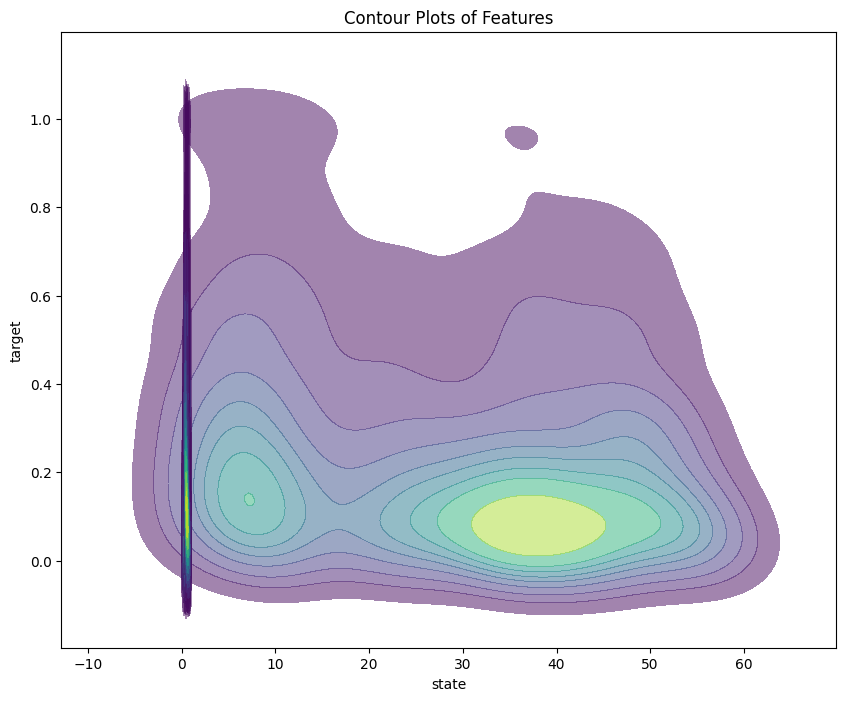

In [ ]:
# Contour plots
plt.figure(figsize=(10, 8))
for feature in X_df1.columns[:-1]:
    sns.kdeplot(data=X_df, x=feature, y='target', fill=True, cmap='viridis', alpha=0.5)
plt.title('Contour Plots of Features')
plt.show()

#Pros:
#May highlight density patterns in the data
#Demonstrates the joint distribution of two variables and their relationship to the target.
#Cons:
#May not work well with high-dimensional datasets.
#Complex distributions may be difficult to interpret.

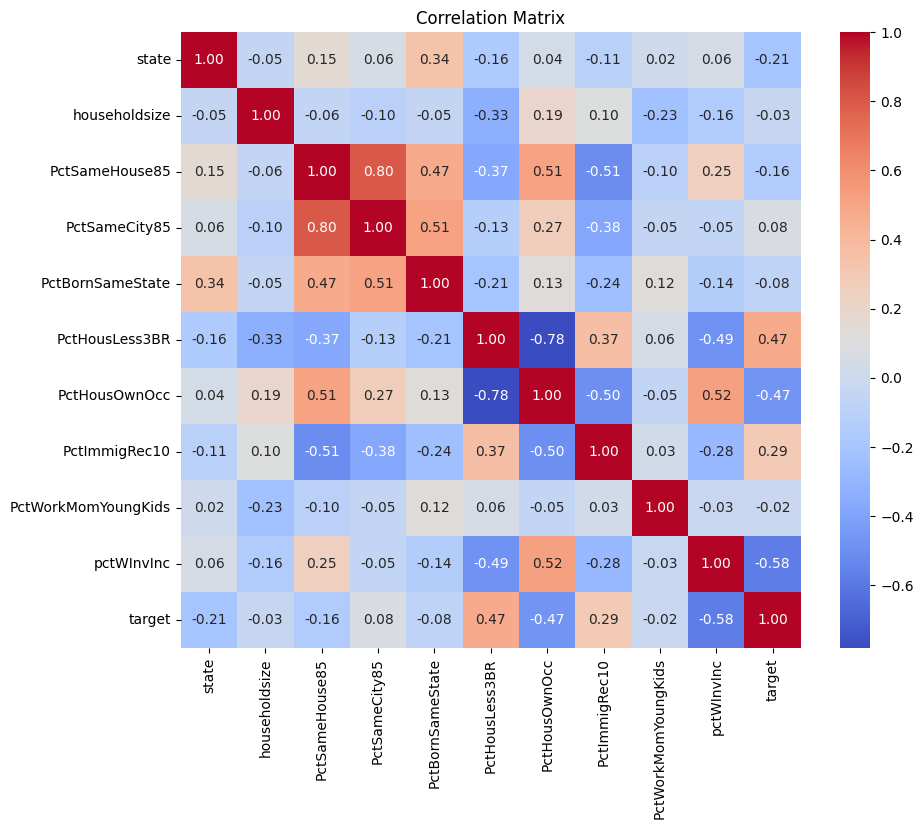

In [ ]:
# Matrix plots
plt.figure(figsize=(10, 8))
sns.heatmap(X_df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#Pros:
#Helps detect multicollinearity.
#Visualizes the correlation between features in a compact form.

#Cons:
#Complexity rises with the number of features
#Restricted to representing linear relationships..

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Step 3: Classification
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df1, y, test_size=0.2, random_state=42)

In [37]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [67]:
class NearestNeighborClassifierManual:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def Edistance(self, a, b):
        return np.sqrt(np.sum((a - b)**2))

    def predict(self, X_test):
        predictions = []

        for test in X_test:
            distances = [self.Edistance(test, train) for train in self.X_train]
            nindex = np.argmin(distances)
            predictions.append(self.y_train[nindex])

        return np.array(predictions)

In [22]:
class GaussianNaiveBayesClassifierManual:
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None

    def fit(self, X_train, y_train):
        self.class_priors = {}
        self.class_means = {}
        self.class_variances = {}
        classes = np.unique(y_train)
        total = len(y_train)

        for i in classes:
            # Prior probabilities
            class_prior = np.sum(y_train == i) / total
            self.class_priors[i] = class_prior

            # mean and variance calculated
            class_samples = X_train[y_train == i]
            class_means = np.mean(class_samples, axis=0)
            class_variances = np.var(class_samples, axis=0)

            self.class_means[i] = class_means
            self.class_variances[i] = class_variances

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            posteriors = []

            for c, prior in self.class_priors.items():
                # maximum likelihood
                likelihood = np.prod(
                    1 / (np.sqrt(2 * np.pi * self.class_variances[c])) *
                    np.exp(-(x_test - self.class_means[c])**2 / (2 * self.class_variances[c]))
                )

                # posterior probabilites
                posterior = prior * likelihood
                posteriors.append(posterior)

            #class having the highest probabilites
            predicted_class = max(self.class_priors, key=lambda c: posteriors[c])
            predictions.append(predicted_class)

        return np.array(predictions)


In [23]:
class SupportVectorMachineClassifierManual:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for epoch in range(self.epochs):
            for i in range(n_samples):
                x = X_train[i]
                y = y_train[i]
                if y * (np.dot(self.weights, x) - self.bias) >= 1:
                    # Update weights for correct samples being classified
                    self.weights -= self.learning_rate * 2 * 1/self.epochs * self.weights
                else:
                    # Updating weights and bias
                    self.weights += self.learning_rate * (y * x - 2 * 1/self.epochs * self.weights)
                    self.bias += self.learning_rate * y

    def predict(self, X_test):
        predictions = np.dot(X_test, self.weights) - self.bias
        return np.sign(predictions)

In [24]:
class ConfusionMatrix:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.n_classes = len(np.unique(y_true))
        self.matrix = self._compute_confusion_matrix()

    def _compute_confusion_matrix(self):
        matrix = np.zeros((self.n_classes, self.n_classes), dtype=int)

        for true_label, pred_label in zip(self.y_true, self.y_pred):
            matrix[true_label, pred_label] += 1

        return matrix

    def plot(self):
        plt.figure(figsize=(8, 6))
        sns.heatmap(self.matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.arange(self.n_classes), yticklabels=np.arange(self.n_classes))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

In [25]:
class EvaluationMetrics:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.confusion_matrix = ConfusionMatrix(y_true, y_pred)
        self.metrics = self._compute_metrics()

    def _compute_metrics(self):
        tp = np.diag(self.confusion_matrix.matrix)
        fp = np.sum(self.confusion_matrix.matrix, axis=0) - tp
        fn = np.sum(self.confusion_matrix.matrix, axis=1) - tp
        tn = np.sum(self.confusion_matrix.matrix) - (tp + fp + fn)

        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * (precision * recall) / (precision + recall)

        return {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'FPR': fpr,
            'FNR': fnr,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score
        }

In [ ]:
#Write a main to test all the above functions

In [56]:
import pandas as pd

#replacing '?' into 0
X_df1.replace('?', 0, inplace=True)

#dropping null values
X_df1.dropna(inplace=True)



In [63]:
column_data_types = X_df1.dtypes
#Displaying the data types
print(column_data_types)

state                    int64
householdsize          float64
PctSameHouse85         float64
PctSameCity85          float64
PctBornSameState       float64
PctHousLess3BR         float64
PctHousOwnOcc          float64
PctImmigRec10          float64
PctWorkMomYoungKids    float64
pctWInvInc             float64
dtype: object


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
y = X_df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df1, y, test_size=0.2, random_state=42)



In [69]:
y

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: target, Length: 1994, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizinf for SVM
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.transform(X_test)

#maaking instances of all the classifiers
knn = NearestNeighborClassifierManual()
gaussian= GaussianNaiveBayesClassifierManual()
svm = SupportVectorMachineClassifierManual()
#fitting in the model
knn.fit(X_train, y_train)
gaussian.fit(X_train, y_train)
svm.fit(X_trainS, y_train)
#predicting
yknn = knn.predict(X_test)
ygaussian = gaussian.predict(X_test)
ysvm = svm.predict(X_testS)

knnM= EvaluationMetrics(y_test, yknn)
gaussianM = EvaluationMetrics(y_test, ygaussian)
svmM = EvaluationMetrics(y_test, ysvm)

print("KNN Classifier Metrics:", knnM.metrics)
print("Gaussian Navie Bayes Classifier Metrics:", gaussianM.metrics)
print("SVM Classifier Metrics:", svmM.metrics)

# Confusion Matrix
confknn = ConfusionMatrix(y_test, yknn)
confknn.plot()
confgaussian = ConfusionMatrix(y_test, ygaussian)
confgaussian.plot()
confsvm = ConfusionMatrix(y_test, ysvm)
confsvm.plot()
plt.show()

#Results are different because of the these factors as:
#k-NN (k-Nearest Neighbors): It relies on the assumption that similar data points have similar labels.
#SVM (Support Vector Machine): It aims to find the hyperplane that best separates different classes.
#Gaussian Naive Bayes: It assumes that features are conditionally independent given the class.